In [88]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import geopandas as gpd
import seaborn as sns


# DAT301 Project 2: Data Scientist Salary Exploration

### Name: Fuqiang Tan


## Introduction:

The purpose of this project is to analyze the “Data Scientist Salary” dataset scraped from Glassdoor by performing data exploration through graphs and maps, using Python packages such as NumPy, pandas, geopandas, and seaborn. This project is a direct translation and extension of Project 1 for DAT301.

Per Professor Eikenberry's suggestion, I have sought out a larger dataset for this project under the same topic of Data Scientist salary. This dataset is two years old, but I believe it is still relevant to what we want to learn. The coverage of the new dataset extended to the global level with 3909 entries, covering similar contents such as "job title", "rating", "salary", "location", "Industry", "Section", and more. We will perform data exploration using Python on this new dataset to answer the following questions:

1.	What is the minimum, maximum and average wage for entry level Data Science positions in different states? (Salary negotiation)
2.	What is the most in demand programming language for Data Scientists? (Skill focus and job opportunities)
3.	Which state in the US offers most opportunity for data professionals? (Job opportunities)
4.	What is the demand for data professionals by different technology sectors, industries, and companies? (Job opportunity)
5.  Which sector or industry has the best and worst rating?


## Dataset: 

Citation:

LARXEL, (2020), Data Scientist Jobs [Dataset], https://www.kaggle.com/datasets/andrewmvd/data-scientist-jobs

"Data Scientist Jobs" dataset, was scraped from the glassdoor using Selenium scrapper. With 3909 entries, it features salary estimate, job description, location, company rating, sector, industry and more.

### Loading the Data:

In [89]:
fname = '/Users/fuqiangtan/Desktop/Project2/DataScientist.csv'

df = pd.read_csv(fname)

df

,Unnamed: 0,index,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,Easy Apply
0,0,0,Senior Data Scientist,$111K-$181K (Glassdoor est.),"ABOUT HOPPER\n\nAt Hopper, we’re on a mission ...",3.5,Hopper\n3.5,"New York, NY","Montreal, Canada",501 to 1000 employees,2007,Company - Private,Travel Agencies,Travel & Tourism,Unknown / Non-Applicable,-1,-1
1,1,1,"Data Scientist, Product Analytics",$111K-$181K (Glassdoor est.),"At Noom, we use scientifically proven methods ...",4.5,Noom US\n4.5,"New York, NY","New York, NY",1001 to 5000 employees,2008,Company - Private,"Health, Beauty, & Fitness",Consumer Services,Unknown / Non-Applicable,-1,-1
2,2,2,Data Science Manager,$111K-$181K (Glassdoor est.),Decode_M\n\nhttps://www.decode-m.com/\n\nData ...,-1.0,Decode_M,"New York, NY","New York, NY",1 to 50 employees,-1,Unknown,-1,-1,Unknown / Non-Applicable,-1,True
3,3,3,Data Analyst,$111K-$181K (Glassdoor est.),Sapphire Digital seeks a dynamic and driven mi...,3.4,Sapphire Digital\n3.4,"Lyndhurst, NJ","Lyndhurst, NJ",201 to 500 employees,2019,Company - Private,Internet,Information Technology,Unknown / Non-Applicable,"Zocdoc, Healthgrades",-1
4,4,4,"Director, Data Science",$111K-$181K (Glassdoor est.),"Director, Data Science - (200537)\nDescription...",3.4,United Entertainment Group\n3.4,"New York, NY","New York, NY",51 to 200 employees,2007,Company - Private,Advertising & Marketing,Business Services,Unknown / Non-Applicable,"BBDO, Grey Group, Droga5",-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3904,3904,4375,AWS Data Engineer,$55K-$112K (Glassdoor est.),About Us\n\nTachyon Technologies is a Digital ...,4.4,Tachyon Technologies\n4.4,"Dublin, OH","Irving, TX",201 to 500 employees,2011,Company - Private,IT Services,Information Technology,$10 to $25 million (USD),-1,-1
3905,3905,4376,Data Analyst â Junior,$55K-$112K (Glassdoor est.),"Job description\nInterpret data, analyze resul...",5.0,"Staffigo Technical Services, LLC\n5.0","Columbus, OH","Woodridge, IL",51 to 200 employees,2008,Company - Private,IT Services,Information Technology,$50 to $100 million (USD),-1,-1
3906,3906,4377,Security Analytics Data Engineer,$55K-$112K (Glassdoor est.),Job DescriptionThe Security Analytics Data Eng...,3.8,"PDS Tech, Inc.\n3.8","Dublin, OH","Irving, TX",5001 to 10000 employees,1977,Company - Private,Staffing & Outsourcing,Business Services,$100 to $500 million (USD),-1,-1
3907,3907,4378,Security Analytics Data Engineer,$55K-$112K (Glassdoor est.),The Security Analytics Data Engineer will inte...,4.0,Data Resource Technologies\n4.0,"Dublin, OH","Omaha, NE",1 to 50 employees,-1,Company - Private,Accounting,Accounting & Legal,Less than $1 million (USD),-1,-1


In [90]:
df.info() # display dataframe info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3909 entries, 0 to 3908
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         3909 non-null   int64  
 1   index              3909 non-null   int64  
 2   Job Title          3909 non-null   object 
 3   Salary Estimate    3909 non-null   object 
 4   Job Description    3909 non-null   object 
 5   Rating             3909 non-null   float64
 6   Company Name       3909 non-null   object 
 7   Location           3909 non-null   object 
 8   Headquarters       3909 non-null   object 
 9   Size               3909 non-null   object 
 10  Founded            3909 non-null   int64  
 11  Type of ownership  3909 non-null   object 
 12  Industry           3909 non-null   object 
 13  Sector             3909 non-null   object 
 14  Revenue            3909 non-null   object 
 15  Competitors        3909 non-null   object 
 16  Easy Apply         3909 

Confirm 3909 of entries

In [91]:
df.shape

(3909, 17)

Display top 5 lines of the dataframe

In [92]:
df.head(5)

,Unnamed: 0,index,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,Easy Apply
0,0,0,Senior Data Scientist,$111K-$181K (Glassdoor est.),"ABOUT HOPPER\n\nAt Hopper, we’re on a mission ...",3.5,Hopper\n3.5,"New York, NY","Montreal, Canada",501 to 1000 employees,2007,Company - Private,Travel Agencies,Travel & Tourism,Unknown / Non-Applicable,-1,-1
1,1,1,"Data Scientist, Product Analytics",$111K-$181K (Glassdoor est.),"At Noom, we use scientifically proven methods ...",4.5,Noom US\n4.5,"New York, NY","New York, NY",1001 to 5000 employees,2008,Company - Private,"Health, Beauty, & Fitness",Consumer Services,Unknown / Non-Applicable,-1,-1
2,2,2,Data Science Manager,$111K-$181K (Glassdoor est.),Decode_M\n\nhttps://www.decode-m.com/\n\nData ...,-1.0,Decode_M,"New York, NY","New York, NY",1 to 50 employees,-1,Unknown,-1,-1,Unknown / Non-Applicable,-1,True
3,3,3,Data Analyst,$111K-$181K (Glassdoor est.),Sapphire Digital seeks a dynamic and driven mi...,3.4,Sapphire Digital\n3.4,"Lyndhurst, NJ","Lyndhurst, NJ",201 to 500 employees,2019,Company - Private,Internet,Information Technology,Unknown / Non-Applicable,"Zocdoc, Healthgrades",-1
4,4,4,"Director, Data Science",$111K-$181K (Glassdoor est.),"Director, Data Science - (200537)\nDescription...",3.4,United Entertainment Group\n3.4,"New York, NY","New York, NY",51 to 200 employees,2007,Company - Private,Advertising & Marketing,Business Services,Unknown / Non-Applicable,"BBDO, Grey Group, Droga5",-1


Display all column names

In [93]:
df.columns

Index(['Unnamed: 0', 'index', 'Job Title', 'Salary Estimate',
       'Job Description', 'Rating', 'Company Name', 'Location', 'Headquarters',
       'Size', 'Founded', 'Type of ownership', 'Industry', 'Sector', 'Revenue',
       'Competitors', 'Easy Apply'],
      dtype='object')

Check if there is NA or -1 cell(s). Looks like we have quite a few entries to fix.

In [94]:
df.isna().sum()
df[df== -1].count() # check for int that are -1
df[df== '-1'].count() # check for object that are -1

Unnamed: 0           0
index                0
Job Title            0
Salary Estimate      0
Job Description      0
Rating               0
Company Name         0
Location             0
Headquarters         0
Size                 0
Founded              0
Type of ownership    0
Industry             0
Sector               0
Revenue              0
Competitors          0
Easy Apply           0
dtype: int64

Unnamed: 0             0
index                  0
Job Title              0
Salary Estimate        0
Job Description        0
Rating               409
Company Name           0
Location               0
Headquarters           0
Size                   0
Founded              977
Type of ownership      0
Industry               0
Sector                 0
Revenue                0
Competitors            0
Easy Apply             0
dtype: int64

Unnamed: 0              0
index                   0
Job Title               0
Salary Estimate         0
Job Description         0
Rating                  0
Company Name            0
Location                0
Headquarters          240
Size                  229
Founded                 0
Type of ownership     229
Industry              546
Sector                546
Revenue               229
Competitors          2760
Easy Apply           3745
dtype: int64

Check for duplicate data

In [95]:
print(df.shape, df.drop_duplicates().shape)

(3909, 17) (3909, 17)


### Data Wrangling
To clean the dataset, we begin with dropping the excess columns of "index" and "unnamed". Then we all column names in lower case and replace the names of the columns we are going to use with single word descriptions for easy reference. Because the salary column makes up of lower and upper bounds. To make it usable for the analysis, we divide the lower and upper bound into two columns and remove any excess characters such as 'K' and '$'. We also create a third column where the average of the lower and upper bound sit.

Based on NA and -1 counts tables above, the data frame needed some trimming in the sector, rating, and industry columns to remove entries with missing data, drop any NAs and reset the indexes. We would also want to focus the location at the state level, so the city of the location column is dropped. 

To make analyzing the popularity of programming languages per sector possible, we proceed to parse programming language keywords such as "Python", "R", "Spark", "SQL", etc. from the job description. Finally, the "Company Name" column was cleaned, removing excess rating numbers from that column.


We start with dropping the unnamed and the excess index column

In [96]:
df.drop(["Unnamed: 0","index"],axis=1,inplace=True)

Make column names lower case and replace salary estimate with just salary.

In [97]:
df.columns=map(str.lower,df.columns)
df.rename(columns={'salary estimate':'salary'},inplace=True)

Split the lower bound and upper bound of Salary Estimate into two cells, and convert per hour salary into yearly salary.

In [98]:
# conversion variables
hours = 40
weeks = 52

for i in range(df.shape[0]):
    
    salary = df.loc[i,"salary"]
    salary = salary.replace("$", "") #remove $
    salary = salary.replace("K", "") #remove K
    
    #per hour conversion
    if "Per Hour" in salary:
        lower, upper = salary.split("-") # split the #s at -
        lower = lower.strip()
        lower = (int(lower)*hours*weeks)/1000 #lower hourly rate * 40hrs per week * 52wees a year
        
        upper, _ = upper.split("Per") # split at Per
        upper= upper.strip()
        upper = (int(upper)*hours*weeks)/1000 #upper hourly rate * 40hrs per week * 52wees a year
        
    #non conversion, split lower and upper, clean cell
    else:
        lower, upper = salary.split("-") # split at -
        lower = lower.strip()
        
        upper, _= upper.split("(") # split at ()
        upper = upper.strip()
    
        
    lower = int(lower)
    upper = int(upper)
    average = int((lower+upper)/2)
    
    df.loc[i,"salary_lower"] = lower
    df.loc[i,"salary_upper"] = upper
    df.loc[i,"salary_average"] = average
    

Drop NA's and -1's from columns

In [99]:
df['sector']=df['sector'].replace([-1],np.nan)
df['rating']=df['rating'].replace([-1],np.nan)
df['industry']=df['industry'].replace([-1],np.nan)
df=df.dropna(how='any',axis=0)
df=df.reset_index(drop=True)

Isolate states to be used for creating FIPS and merge with GeoDataFrame

In [100]:
df['location'] = df['location'].apply(lambda x: x.split(',')[1])

Parse required programming skills from job description. Including Python, R, spark, aws, excel, sql, sas, keras, scikit, tensor, hadoop, tableau, power_bi, flink, mongo, google analytics, julia, java, scala, javascript, swift, matlab, golang, and c++.

In [101]:
df['python'] = df['job description'].apply(lambda x: 1 if 'python' in x.lower() else 0)
#df.python.value_counts()
df['r'] = df['job description'].apply(lambda x: 1 if 'r studio' in x.lower() or 'r-studio' in x.lower() else 0)
#df.r.value_counts()
df['spark'] = df['job description'].apply(lambda x: 1 if 'spark' in x.lower() else 0)

df['aws'] = df['job description'].apply(lambda x: 1 if 'aws' in x.lower() else 0)

df['excel'] = df['job description'].apply(lambda x: 1 if 'excel' in x.lower() else 0)

df['sql'] = df['job description'].apply(lambda x: 1 if 'sql' in x.lower() else 0)

df['sas'] = df['job description'].apply(lambda x: 1 if 'sas' in x.lower() else 0)

df['keras'] = df['job description'].apply(lambda x: 1 if 'keras' in x.lower() else 0)

df['scikit'] = df['job description'].apply(lambda x: 1 if 'scikit' in x.lower() else 0)

df['tensor'] = df['job description'].apply(lambda x: 1 if 'tensor' in x.lower() else 0)
#df.tensor.value_counts()
df['hadoop'] = df['job description'].apply(lambda x: 1 if 'hadoop' in x.lower() else 0)

df['tableau'] = df['job description'].apply(lambda x: 1 if 'tableau' in x.lower() else 0)

df['power_bi'] = df['job description'].apply(lambda x: 1 if 'powerbi' in x.lower() else 0)

df['flink'] = df['job description'].apply(lambda x: 1 if 'flink' in x.lower() else 0)

df['mongo'] = df['job description'].apply(lambda x: 1 if 'mongo' in x.lower() else 0)

df['google_an'] = df['job description'].apply(lambda x: 1 if 'google ana' in x.lower() else 0)

df['julia'] = df['job description'].apply(lambda x: 1 if 'julia' in x.lower() else 0)

df['java'] = df['job description'].apply(lambda x: 1 if 'java' in x.lower() else 0)

df['scala'] = df['job description'].apply(lambda x: 1 if 'scala' in x.lower() else 0)

df['javascript'] = df['job description'].apply(lambda x: 1 if 'javascript' in x.lower() else 0)

df['swift'] = df['job description'].apply(lambda x: 1 if 'swift' in x.lower() else 0)

df['matlab'] = df['job description'].apply(lambda x: 1 if 'matlab' in x.lower() else 0)

df['golang'] = df['job description'].apply(lambda x: 1 if 'golang' in x.lower() else 0)

df['cpp'] = df['job description'].apply(lambda x: 1 if 'c++' in x.lower() else 0)
#df.cpp.value_counts()

df.head()

,job title,salary,job description,rating,company name,location,headquarters,size,founded,type of ownership,...,mongo,google_an,julia,java,scala,javascript,swift,matlab,golang,cpp
0,Senior Data Scientist,$111K-$181K (Glassdoor est.),"ABOUT HOPPER\n\nAt Hopper, we’re on a mission ...",3.5,Hopper\n3.5,NY,"Montreal, Canada",501 to 1000 employees,2007,Company - Private,...,0,0,0,0,0,0,0,0,0,0
1,"Data Scientist, Product Analytics",$111K-$181K (Glassdoor est.),"At Noom, we use scientifically proven methods ...",4.5,Noom US\n4.5,NY,"New York, NY",1001 to 5000 employees,2008,Company - Private,...,0,0,0,0,0,0,0,0,0,0
2,Data Analyst,$111K-$181K (Glassdoor est.),Sapphire Digital seeks a dynamic and driven mi...,3.4,Sapphire Digital\n3.4,NJ,"Lyndhurst, NJ",201 to 500 employees,2019,Company - Private,...,0,0,0,0,0,0,0,0,0,0
3,"Director, Data Science",$111K-$181K (Glassdoor est.),"Director, Data Science - (200537)\nDescription...",3.4,United Entertainment Group\n3.4,NY,"New York, NY",51 to 200 employees,2007,Company - Private,...,0,0,0,0,0,0,0,0,0,0
4,Data Scientist,$111K-$181K (Glassdoor est.),Job Brief\n\nThe ideal candidate will have pre...,2.9,IFG Companies\n2.9,NY,"Hartford, CT",201 to 500 employees,1985,Company - Private,...,0,0,0,0,0,0,0,0,0,0


Clean the company name column, removing rating after \n.

In [102]:
for i in range(df.shape[0]):
    name = df.loc[i,"company name"]
    if "\n" in name:
        name,_ = name.split("\n")
    df.loc[i,"company_name"] = name


## Data Analysis and Visualization: 

### National Average Salaries

The first question we want to answer is "What is the minimum, maximum, and average wage for entry-level Data Science positions in different states?" Before diving in, we want to see the national average first, so we could have a reference for comparison. And the national averages are as follows:

In [103]:
averagedf=df.copy()
averagedf = averagedf[['salary_lower','salary_upper','salary_average']].mean()
averagedf = pd.DataFrame(averagedf)
averagedf = averagedf.reset_index()
averagedf.rename(columns={ averagedf.columns[0]: "bound", averagedf.columns[1]: "national average salary (K)"}, inplace = True)
averagedf

,bound,national average salary (K)
0,salary_lower,82.369143
1,salary_upper,134.476571
2,salary_average,108.191429


### State Min, Max, Mean Salaries

Interpreting from the table below, both upper and average column share states, such as DE, CA, NY, NJ, and AZ. We can deduce the states that appear in the upper limits offer competitive pay because the state average is near the top end of the scale. But we should also consider the living cost in these states is also on top of the national scale. 

It would be clever to work remotely while making a top-notch salary from states with a low cost of living. But not worth living and working there, such as in states like CA and NY, which are known for the high cost of living. Also, based on the state minimum salary column, we should avoid looking for jobs in FL, IL, PA, and OH. States are not known for their tech industries.

In [104]:
averagedf=df.copy()
averagedf=averagedf.groupby(['location'])['salary_lower','salary_upper','salary_average'].mean()

averagedf = pd.DataFrame(averagedf)
averagedf= averagedf.round() #convert columns into int
averagedf.drop(averagedf.tail(1).index,inplace=True)
averagedf['states'] = averagedf.index
averagedf.sort_values(['salary_average'], ascending=False)

/var/folders/qr/r3dsm8252131q_67byng2h0w0000gn/T/ipykernel_40075/3625979963.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  averagedf=averagedf.groupby(['location'])['salary_lower','salary_upper','salary_average'].mean()


,salary_lower,salary_upper,salary_average,states
location,,,,
DE,107.0,172.0,140.0,DE
CA,105.0,164.0,134.0,CA
NY,112.0,157.0,134.0,NY
NJ,97.0,142.0,120.0,NJ
AZ,75.0,119.0,97.0,AZ
TX,70.0,123.0,96.0,TX
OH,67.0,122.0,95.0,OH
PA,70.0,120.0,95.0,PA
IL,62.0,107.0,84.0,IL


### State Average Salary Bar Plot

The following bar plot provides a visualization of the average salary per state in the US. The top are consist of DE, NY, CA, NJ, and AZ. We will most likely to able to find a Data Science related job with comfortable pay after graduation. Did not expect AZ to be in the top five.

Then we project that data onto a map to visualize the data from a geographical point of view. White spaces are appearing on the map, indicating missing data for those states, this could be a sign that the data is limited in the scope of location, but it is recreated for the purpose of translating Project 1.

<AxesSubplot:ylabel='states'>

Text(0.5, 1.0, 'Data Scientist Average Salary by State')

Text(0.5, 0, 'States')

Text(0, 0.5, 'Salary (K)')

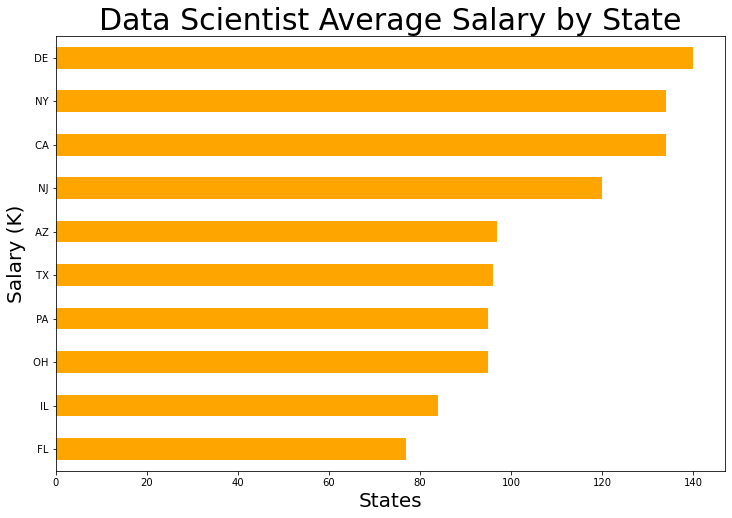

In [105]:
averagedf.sort_values('salary_average',inplace=True)

fig1, ax1 = plt.subplots(1,1, figsize=(12, 8))

averagedf.plot.barh(ax=ax1 ,x='states', y='salary_average', legend=None, color='orange')
plt.title('Data Scientist Average Salary by State',fontsize=30)
plt.xlabel('States',fontsize=20)
plt.ylabel('Salary (K)',fontsize=20)


For the purpose of this project, we put that data onto a map to show that we capable of tranlating it, even though we have limited geographical coverage with this dataset.

<AxesSubplot:>

Text(0.5, 1.0, 'DS Average Salary (K)')

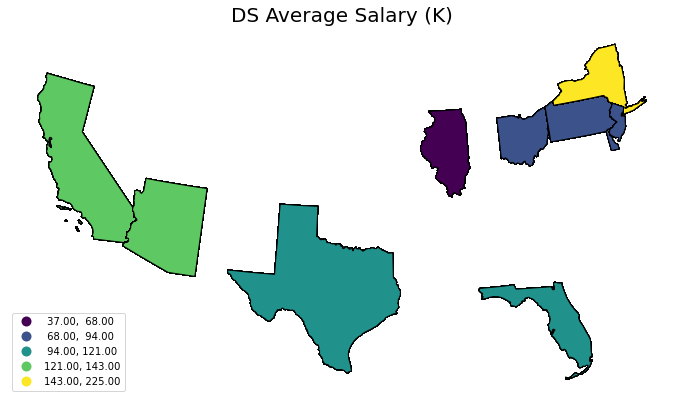

In [106]:
#geodataframe
url_state = 'https://www2.census.gov/geo/tiger/GENZ2018/shp/cb_2018_us_state_20m.zip'

state_gdf = gpd.read_file(url_state)


#Exclude every row that does not represent one of the lower 48 states or the District of Columbia, as encoded by the variabel STATEFP.
exclude_list = [15, 72, 2, 60, 66, 69, 78]
state_gdf = state_gdf.loc[~state_gdf['STATEFP'].astype(int).isin(exclude_list)]

#Convert the Coordinate Reference Systems (CRS) to the North American Albers, with EPSG code 5070.
state_gdf = state_gdf.to_crs(5070)

state_gdf['FIPS'] = state_gdf.STATEFP


state_gdf['FIPS'] = state_gdf['FIPS'].astype(str).astype(int)

transform = {}
for i in range(len(state_gdf)):
    transform[state_gdf['STUSPS'].iloc[i]] = state_gdf['STATEFP'].iloc[i]

df1 = df.copy()
df1['location'] = df1['location'].str.strip()
df1['STATEFP'] = df1['location'].map(transform)

df1.rename(columns={'STATEFP':'FIPS'},inplace=True)

df1=df1[~df1['FIPS'].isnull()]

df1['FIPS']=df1['FIPS'].replace([-1],np.NaN)

df1['FIPS'] = df1['FIPS'].astype(int)

df1 = state_gdf.merge(df1, left_on='FIPS', right_on='FIPS')


fig1, ax1 = plt.subplots(1,1, figsize=(12, 8))

df1.plot(ax=ax1, column='salary_average', edgecolor='black', scheme='quantiles',k=5, legend=True, legend_kwds={'loc': 'lower left'})
ax1.set_title('DS Average Salary (K)',fontsize=20)
ax1.set_axis_off()

### In Demand Programming Languges

Next, we want to answer the second question, "What is the most in-demand programming language for Data scientists?" 

Language requirements were parsed from the description column for this analysis. The following bar plot shows the top in-demand languages. With this insight, we could focus on learning the top languages on the bar plot to improve our marketable skills, which would in return make ourselves more desirable to employers, so we could negotiate higher salaries. As appears on the bar plot, Python, SQL, Excel, AWS, and Spark are the top five most in-demand languages.

<AxesSubplot:xlabel='langs'>

Text(0.5, 1.0, 'In Demand Programming Languages')

Text(0.5, 0, 'Programming Language')

Text(0, 0.5, 'Job Post (count)')

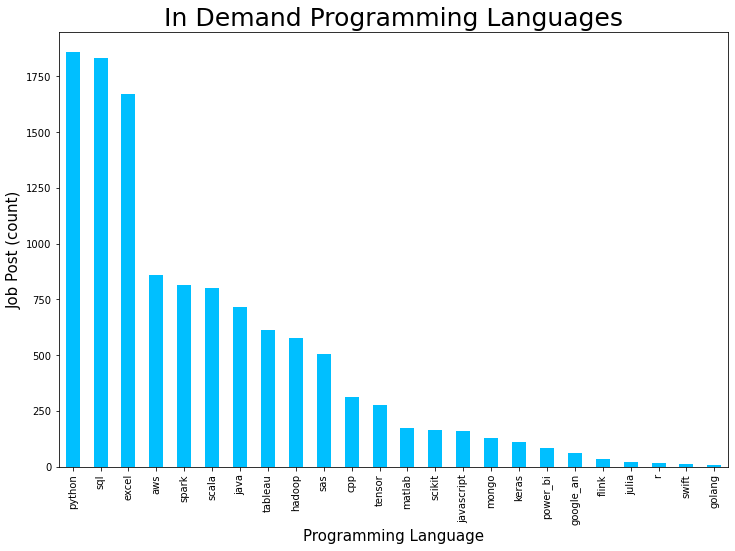

In [107]:
df2=df.copy()
df2=df2[["python","r","spark","aws", "excel", "sql", "sas", "keras", "scikit", "tensor", "hadoop", "tableau", "power_bi", "flink", "mongo", "google_an", "julia", "java", "scala", "javascript", "swift", "matlab", "golang", "cpp"]]
df2=df2.sum()
df2=pd.DataFrame(df2)
df2['langs']=df2.index

df2.rename(columns={ df2.columns[0]: "count" }, inplace = True)


fig1, ax1 = plt.subplots(1,1, figsize=(12, 8))

df2=df2.sort_values('count', ascending=[0])

df2.plot.bar(ax=ax1 ,x='langs', y='count', legend=None, color='deepskyblue')
plt.title('In Demand Programming Languages',fontsize=25)
plt.xlabel('Programming Language',fontsize=15)
plt.ylabel('Job Post (count)',fontsize=15)
#Python, R, spark, aws, excel, sql, sas, keras, scikit, tensor, hadoop, tableau, power_bi, flink, mongo, google analytics, julia, java, scala, javascript, swift, matlab, golang, and c++

### Opportunities by State

The third question we want to answer is "Which states in the US offer the most opportunity for data professionals?" 

The following table shows Texas, California, Illinois, Pennsylvania, and New York has the most appetite for data professionals. Arizona stands top six, meaning most of us will be able to find a Data Science related job after graduation without moving.

Then we project that data onto the state map. The white space on the map indicates that the dataset lack coverage for those states. The map is recreated for the sake of translating Project 1 over and displaying competence in creating maps using GeoDataFrame with a given location on a dataset. Due to the limited scope in a location with the dataset, it has limited power in informing the audience.

In [108]:
df3= df.copy()
df3['location'] = df3['location'].str.strip()
opp_count = df3['location'].value_counts()
opp_count = pd.DataFrame(opp_count)
opp_count = opp_count.reset_index()
opp_count = opp_count.drop(labels=10, axis=0)
opp_count.rename(columns={ opp_count.columns[0]: "location",opp_count.columns[1]: "count" }, inplace = True)
opp_count

,location,count
0,TX,1110
1,CA,956
2,IL,335
3,PA,303
4,NY,270
5,AZ,260
6,OH,167
7,FL,58
8,NJ,28
9,DE,9


Let's plot the above table.

<AxesSubplot:xlabel='location'>

Text(0.5, 1.0, 'DS Opportunities by State')

Text(0.5, 0, 'State')

Text(0, 0.5, 'Job Post (count)')

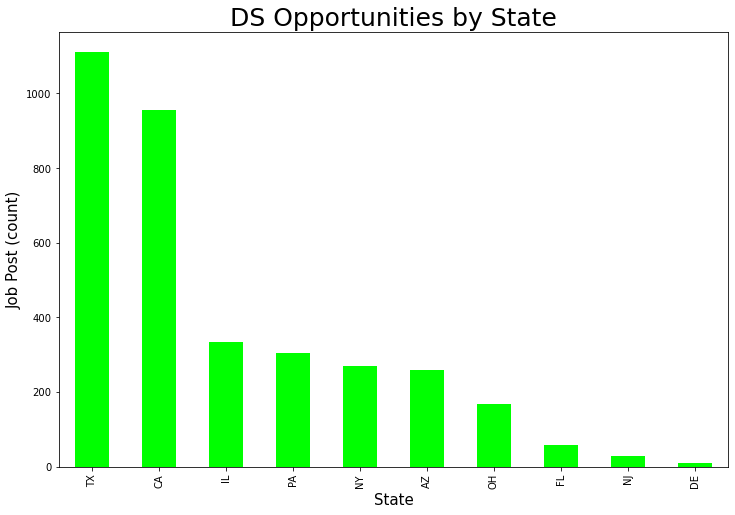

In [109]:
fig1, ax1 = plt.subplots(1,1, figsize=(12, 8))
opp_count.plot.bar(ax=ax1 ,x='location', y='count', legend=None, color='lime')
plt.title('DS Opportunities by State',fontsize=25)
plt.xlabel('State',fontsize=15)
plt.ylabel('Job Post (count)',fontsize=15)

<AxesSubplot:>

Text(0.5, 1.0, 'Job Post Counts by State')

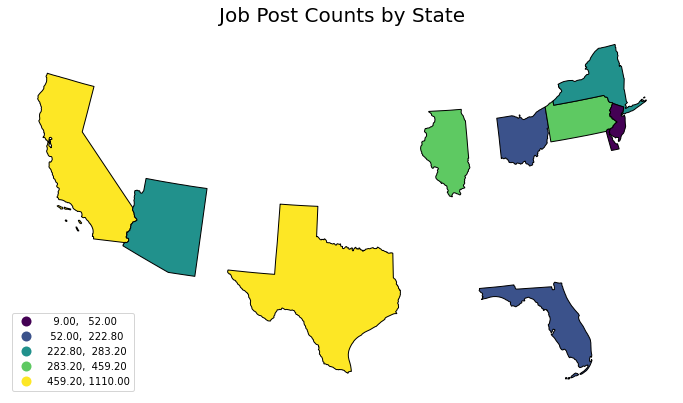

In [110]:
#geodataframe
url_state = 'https://www2.census.gov/geo/tiger/GENZ2018/shp/cb_2018_us_state_20m.zip'

state_gdf = gpd.read_file(url_state)


#Exclude every row that does not represent one of the lower 48 states or the District of Columbia, as encoded by the variabel STATEFP.
exclude_list = [15, 72, 2, 60, 66, 69, 78]
state_gdf = state_gdf.loc[~state_gdf['STATEFP'].astype(int).isin(exclude_list)]

#Convert the Coordinate Reference Systems (CRS) to the North American Albers, with EPSG code 5070.
state_gdf = state_gdf.to_crs(5070)

state_gdf['FIPS'] = state_gdf.STATEFP


state_gdf['FIPS'] = state_gdf['FIPS'].astype(str).astype(int)

transform = {}
for i in range(len(state_gdf)):
    transform[state_gdf['STUSPS'].iloc[i]] = state_gdf['STATEFP'].iloc[i]

# df1 = df.copy()
opp_count['location'] = opp_count['location'].str.strip()
opp_count['STATEFP'] = opp_count['location'].map(transform)


opp_count.rename(columns={'STATEFP':'FIPS'},inplace=True)


opp_count['FIPS'] = opp_count['FIPS'].astype(int)


opp_count = state_gdf.merge(opp_count, left_on='FIPS', right_on='FIPS')

fig1, ax1 = plt.subplots(1,1, figsize=(12, 8))

opp_count.plot(ax=ax1, column='count', edgecolor='black', scheme='quantiles',k=5, legend=True, legend_kwds={'loc': 'lower left'})
ax1.set_title('Job Post Counts by State',fontsize=20)
ax1.set_axis_off()

### Opportunies by Sector,  Industry and Company

The fourth question we want to answer is "What is the demand for data professionals in different technology sectors and industries?"

Traveling down the hierarchy from the sector level, it would appear industries that rely on analytics for innovation and growth, such as IT, Business, Biotech, Finance, and healthcare sectors show the most appetite for data professionals. The same notion also applies to the industry level. Further down to the company level, the top five consist of companies from IT, which make sense that the IT industry and sector show the largest counts in the bar plots.

<AxesSubplot:xlabel='sector'>

Text(0.5, 1.0, 'DS Opportunities by Sector')

Text(0.5, 0, 'Job Sector')

Text(0, 0.5, 'Job Post (count)')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18]),
 [Text(0, 0, 'Information Technology'),
  Text(1, 0, 'Business Services'),
  Text(2, 0, 'Biotech & Pharmaceuticals'),
  Text(3, 0, 'Finance'),
  Text(4, 0, 'Health Care'),
  Text(5, 0, 'Insurance'),
  Text(6, 0, 'Education'),
  Text(7, 0, 'Manufacturing'),
  Text(8, 0, 'Government'),
  Text(9, 0, 'Media'),
  Text(10, 0, 'Accounting & Legal'),
  Text(11, 0, 'Retail'),
  Text(12, 0, 'Aerospace & Defense'),
  Text(13, 0, 'Oil, Gas, Energy & Utilities'),
  Text(14, 0, 'Telecommunications'),
  Text(15, 0, 'Non-Profit'),
  Text(16, 0, 'Consumer Services'),
  Text(17, 0, 'Transportation & Logistics'),
  Text(18, 0, 'Construction, Repair & Maintenance')])

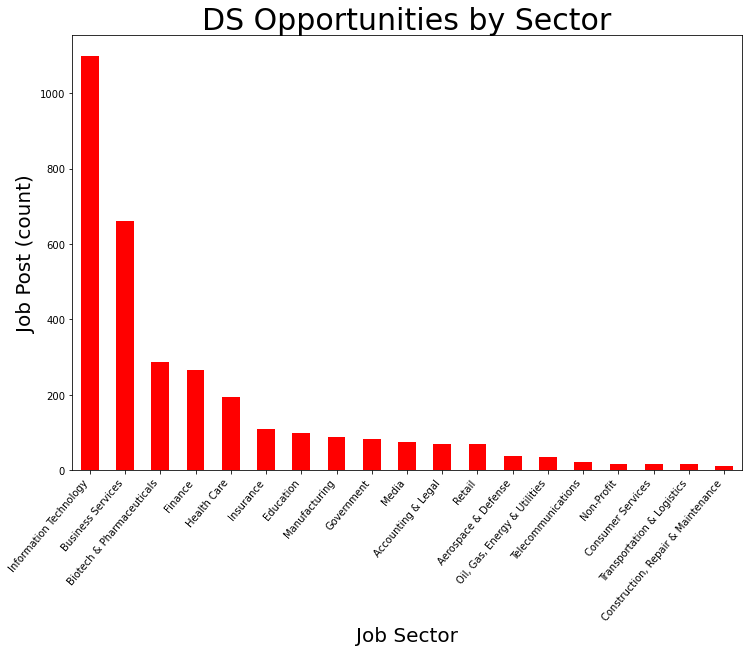

In [111]:
sector = df.copy()
sector = sector["sector"].value_counts().sort_values(ascending=False).head(20)
sector = pd.DataFrame(sector)
sector = sector.reset_index()

sector.rename(columns={sector.columns[0]:"sector", sector.columns[1]: "count" }, inplace = True)

sector = sector[sector.sector != '-1'] #drop -1 row

fig1, ax1 = plt.subplots(1,1, figsize=(12, 8))
sector.plot.bar(ax=ax1 ,x='sector', y='count', legend=None, color='red')
plt.title('DS Opportunities by Sector',fontsize=30)
plt.xlabel('Job Sector',fontsize=20)
plt.ylabel('Job Post (count)',fontsize=20)
plt.xticks(rotation=50, ha='right') # make x label slant for readibility

<AxesSubplot:xlabel='industry'>

Text(0.5, 1.0, 'DS Opportunities by Job Industry')

Text(0.5, 0, 'Job Industry')

Text(0, 0.5, 'Job Post (count)')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18]),
 [Text(0, 0, 'IT Services'),
  Text(1, 0, 'Staffing & Outsourcing'),
  Text(2, 0, 'Biotech & Pharmaceuticals'),
  Text(3, 0, 'Computer Hardware & Software'),
  Text(4, 0, 'Internet'),
  Text(5, 0, 'Health Care Services & Hospitals'),
  Text(6, 0, 'Consulting'),
  Text(7, 0, 'Enterprise Software & Network Solutions'),
  Text(8, 0, 'Investment Banking & Asset Management'),
  Text(9, 0, 'Advertising & Marketing'),
  Text(10, 0, 'Insurance Carriers'),
  Text(11, 0, 'Colleges & Universities'),
  Text(12, 0, 'Accounting'),
  Text(13, 0, 'Banks & Credit Unions'),
  Text(14, 0, 'Research & Development'),
  Text(15, 0, 'Federal Agencies'),
  Text(16, 0, 'Lending'),
  Text(17, 0, 'Aerospace & Defense'),
  Text(18, 0, 'Video Games')])

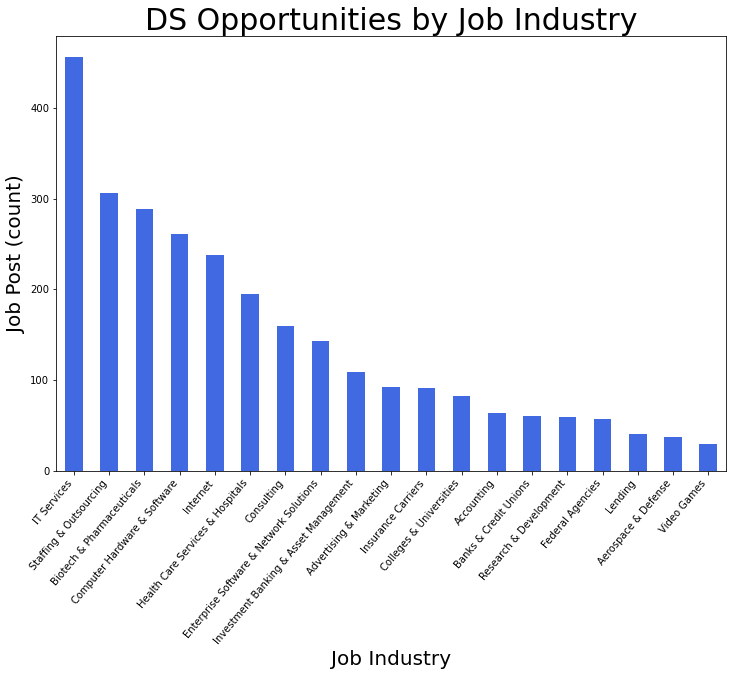

In [112]:
industry = df.copy()
industry = industry["industry"].value_counts().sort_values(ascending=False).head(20)
industry = pd.DataFrame(industry).reset_index()
#industry = industry.reset_index()

industry.rename(columns={industry.columns[0]:"industry", industry.columns[1]: "count" }, inplace = True)

industry = industry[industry.industry != '-1'] #drop -1 row


fig1, ax1 = plt.subplots(1,1, figsize=(12, 8))
industry.plot.bar(ax=ax1 ,x='industry', y='count', legend=None, color='royalblue')
plt.title('DS Opportunities by Job Industry',fontsize=30)
plt.xlabel('Job Industry',fontsize=20)
plt.ylabel('Job Post (count)',fontsize=20)
plt.xticks(rotation=50, ha='right') # make x label slant for readibility

We want to also find out companies that offer the most Data Science related jobs.

<AxesSubplot:xlabel='company'>

Text(0.5, 1.0, 'Opportunities by Company')

Text(0.5, 0, 'Company')

Text(0, 0.5, 'Job Post (count)')

(0.0, 80.0)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]),
 [Text(0, 0, 'Apple'),
  Text(1, 0, 'IBM'),
  Text(2, 0, 'Amazon'),
  Text(3, 0, 'Staffigo Technical Services, LLC'),
  Text(4, 0, 'Facebook'),
  Text(5, 0, 'Diverse Lynx'),
  Text(6, 0, 'Solekai Systems Corp'),
  Text(7, 0, 'Southwest Research Institute'),
  Text(8, 0, 'Varsity Tutors'),
  Text(9, 0, 'Humana'),
  Text(10, 0, 'GSK'),
  Text(11, 0, 'CyberCoders'),
  Text(12, 0, 'J&J Family of Companies'),
  Text(13, 0, "Nationwide Children's Hospital"),
  Text(14, 0, 'Houston Methodist'),
  Text(15, 0, 'Pfizer'),
  Text(16, 0, 'Spark Therapeutics'),
  Text(17, 0, 'Kforce'),
  Text(18, 0, 'Internal Revenue Service'),
  Text(19, 0, 'The University of Texas at Austin')])

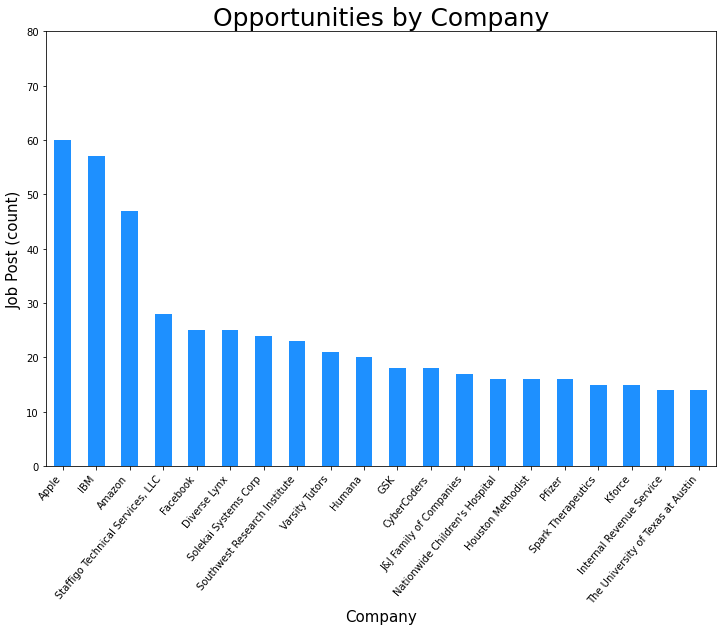

In [113]:
opp_company = df.copy()
opp_company = opp_company["company_name"].value_counts().sort_values(ascending=False).head(20)
opp_company = pd.DataFrame(opp_company)
opp_company = opp_company.reset_index()

opp_company.rename(columns={opp_company.columns[0]:"company",opp_company.columns[1]: "count" }, inplace = True)


fig1, ax1 = plt.subplots(1,1, figsize=(12, 8))
opp_company.plot.bar(ax=ax1 ,x='company', y='count', legend=None, color='dodgerblue')
plt.title('Opportunities by Company',fontsize=25)
plt.xlabel('Company',fontsize=15)
plt.ylabel('Job Post (count)',fontsize=15)
plt.ylim(0,80)
plt.xticks(rotation=50, ha='right')

### Ratings by Job Sector and Industry

The fifth question we want to ask is "Which sector or industry has the best and worst rating?"

We not only want to be paid well, but we also like to be treated well at our nine-to-five job. Job rating is extremely important in finding companies that treat their employee well, which play into higher job satisfaction past the honeymoon phase, which also affects retention rate in the long term. We would not want to move for a job and only to quit and move again in less than a year.

Let's create a data frame that includes rating and average salary grouped by job sector and industry. The top five industries ranked by rating to go in as a Data Scientist, are Building & Personnel Services, Food Production, Colleges & Universities, Transportation Equipment, and Transportation Management, spanned across five sectors. The average salary is also moderate when compared to industries and sectors with lower ratings.

We also look into industries to avoid going in as Data Scientists, they are Gas Stations, Farm Support Services, Utilities, Convenience Stores & Truck Stops, and News outlets. By name, these industries tend to involve labor and are likely to be exposed to the elements. The lower average salary could also be a contributing factor to the low rating.

Despite I.T. offering the most opportunities shown in the last section, it does not stand in the top five or bottom five, in terms of rating. Business services offer many opportunities and also stands top of the rating list with moderate compensation. 

In [114]:
ratingdf=df.copy()
ratingdf=ratingdf.groupby(['sector','industry'])['rating','salary_average'].mean()
ratingdf=ratingdf.sort_values(by='rating',ascending=False).head(10)
ratingdf = ratingdf.reset_index()
ratingdf = ratingdf[ratingdf.sector != '-1']


ratingtp=df.copy()
ratingtp=ratingtp.groupby(['sector','industry'])['rating','salary_average'].mean()
ratingtp=ratingtp.sort_values(by='rating',ascending=False)
ratingtp = ratingtp.reset_index()
ratingtp = ratingtp[ratingtp.sector != '-1']

#top 5
top=ratingtp.copy()
top = top.head(10)
top.round(2)

#botttom 5
bot=ratingtp.copy()
bot=bot.tail(10)
bot.round(2)

/var/folders/qr/r3dsm8252131q_67byng2h0w0000gn/T/ipykernel_40075/2158554589.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  ratingdf=ratingdf.groupby(['sector','industry'])['rating','salary_average'].mean()
/var/folders/qr/r3dsm8252131q_67byng2h0w0000gn/T/ipykernel_40075/2158554589.py:9: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  ratingtp=ratingtp.groupby(['sector','industry'])['rating','salary_average'].mean()


,sector,industry,rating,salary_average
0,Business Services,Building & Personnel Services,4.65,128.00
1,Agriculture & Forestry,Food Production,4.60,131.50
2,Education,Colleges & Universities,4.14,94.48
3,Manufacturing,Transportation Equipment Manufacturing,4.10,143.45
4,Transportation & Logistics,Transportation Management,4.10,122.00
5,Telecommunications,Telecommunications Services,4.07,115.09
6,"Arts, Entertainment & Recreation",Audiovisual,4.05,129.50
7,Education,Education Training Services,4.02,108.91
8,Information Technology,Enterprise Software & Network Solutions,4.01,111.99
9,Finance,Financial Analytics & Research,4.01,94.29


,sector,industry,rating,salary_average
85,Transportation & Logistics,Truck Rental & Leasing,3.10,92.00
86,Telecommunications,"Cable, Internet & Telephone Providers",3.08,99.22
87,Government,State & Regional Agencies,3.05,105.20
88,Transportation & Logistics,Trucking,3.00,85.50
89,Retail,Pet & Pet Supplies Stores,2.98,117.00
90,Retail,Gas Stations,2.90,100.67
91,Agriculture & Forestry,Farm Support Services,2.90,90.00
92,"Oil, Gas, Energy & Utilities",Utilities,2.80,126.67
93,"Restaurants, Bars & Food Services",Convenience Stores & Truck Stops,2.80,72.00
94,Media,News Outlet,2.70,90.00


Project the above data onto a bar plot represented by sector.

<AxesSubplot:xlabel='sector'>

Text(0.5, 1.0, 'Job Rating by Sector')

Text(0.5, 0, 'Job Sector')

Text(0, 0.5, 'Average Rating')

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'Business Services'),
  Text(1, 0, 'Agriculture & Forestry'),
  Text(2, 0, 'Education'),
  Text(3, 0, 'Manufacturing'),
  Text(4, 0, 'Transportation & Logistics'),
  Text(5, 0, 'Telecommunications'),
  Text(6, 0, 'Arts, Entertainment & Recreation'),
  Text(7, 0, 'Education'),
  Text(8, 0, 'Information Technology'),
  Text(9, 0, 'Finance')])

(0.0, 6.0)

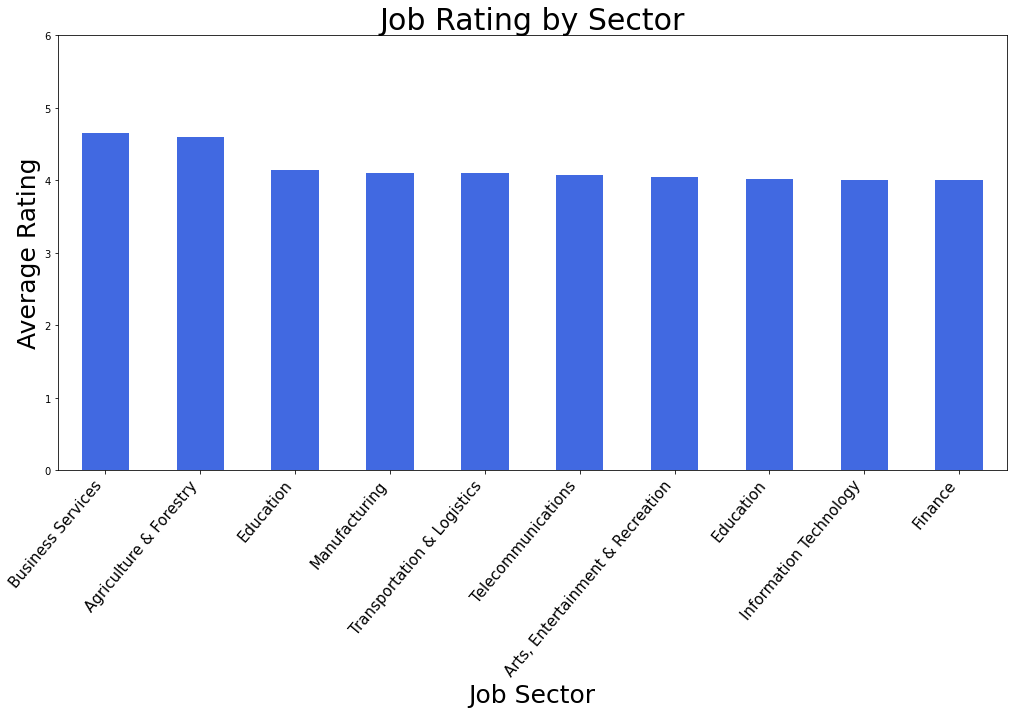

In [115]:
fig1, ax1 = plt.subplots(1,1, figsize=(17, 8))
ratingdf.plot.bar(ax=ax1 ,x='sector', y='rating', legend=None, color='royalblue')
plt.title('Job Rating by Sector',fontsize=30)
plt.xlabel('Job Sector',fontsize=25)
plt.ylabel('Average Rating',fontsize=25)
plt.xticks(rotation=50, ha='right',fontsize=15) # make x label slant for readibility
plt.ylim(0,6)

Project the above data onto a bar plot represented by sector.

<AxesSubplot:xlabel='industry'>

Text(0.5, 1.0, 'Job Rating by Industry')

Text(0.5, 0, 'Job Industry')

Text(0, 0.5, 'Average Rating')

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'Building & Personnel Services'),
  Text(1, 0, 'Food Production'),
  Text(2, 0, 'Colleges & Universities'),
  Text(3, 0, 'Transportation Equipment Manufacturing'),
  Text(4, 0, 'Transportation Management'),
  Text(5, 0, 'Telecommunications Services'),
  Text(6, 0, 'Audiovisual'),
  Text(7, 0, 'Education Training Services'),
  Text(8, 0, 'Enterprise Software & Network Solutions'),
  Text(9, 0, 'Financial Analytics & Research')])

(0.0, 6.0)

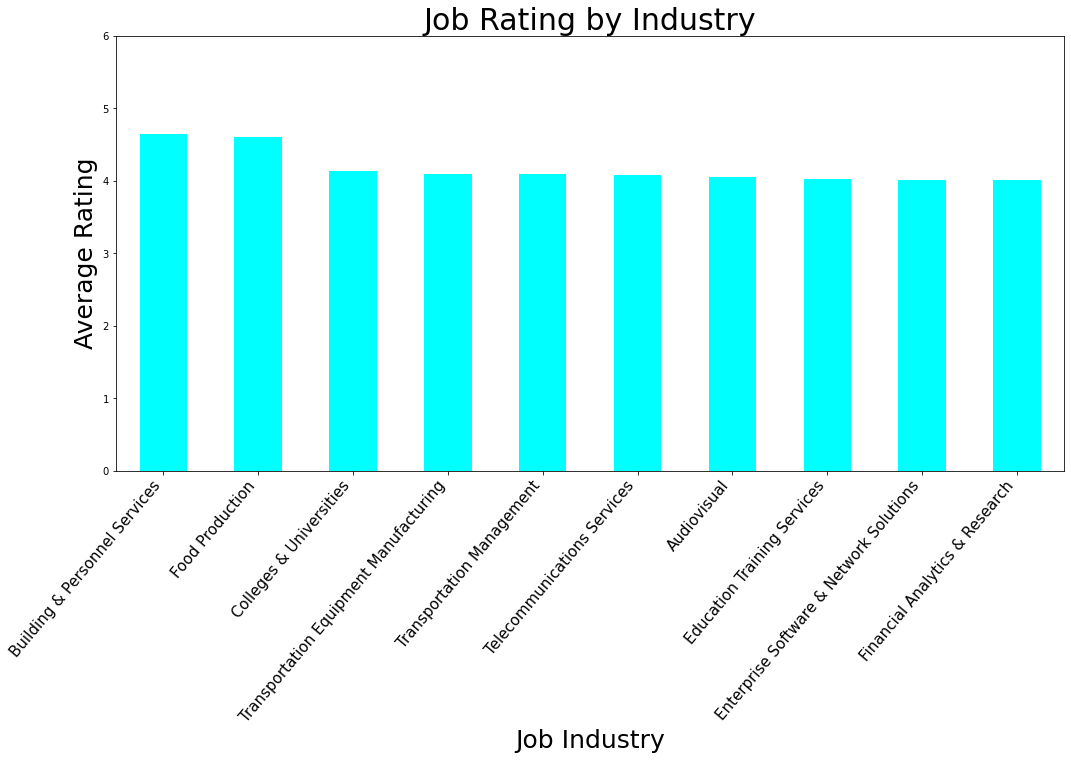

In [116]:
fig1, ax1 = plt.subplots(1,1, figsize=(17, 8))
ratingdf.plot.bar(ax=ax1 ,x='industry', y='rating', legend=None, color='aqua')
plt.title('Job Rating by Industry',fontsize=30)
plt.xlabel('Job Industry',fontsize=25)
plt.ylabel('Average Rating',fontsize=25)
plt.xticks(rotation=50, ha='right', fontsize=15) # make x label slant for readibility
plt.ylim(0,6)

## Conclusions:

Using our data wrangling skills we explored the “Data Scientist Jobs” dataset from Kaggle and answered the questions we set out to answer. We gained insights into salaries and skill demands related to Data Science positions in different states, which provide salary expectations for the upcoming graduating class who majored in Data Science.

We learned that we should avoid looking for jobs in FL, IL, PA, and OH because they have the lowest average salary while the cost of living is still high in those states. It would be clever for us to find a job in DE, CA, NY, NJ, or AZ, work remotely from a low cost of living state, while taking in the highest average salary. AZ is top five in the national average salary for data professionals with a moderate amount of opportunities in the top six, so we are likely to be able to find a job locally with moderate compensation after graduation. We should focus on learning the top five most in-demand languages, Python, SQL, Excel, AWS, and Spark to increase our value in the job market, and make ourselves more desirable to employers. Even though the I.T. industry offers the most jobs, it did not rank high in terms of rating. Business services appear to be top on the rating scale while offering above national average salary with a moderate amount of demand for Data Scientists.

## Sources:
https://www.kaggle.com/datasets/nikhilbhathi/data-scientist-salary-us-glassdoor
https://www.kaggle.com/datasets/andrewmvd/data-scientist-jobs
https://github.com/PlayingNumbers/ds_salary_proj/blob/master/data_cleaning.py